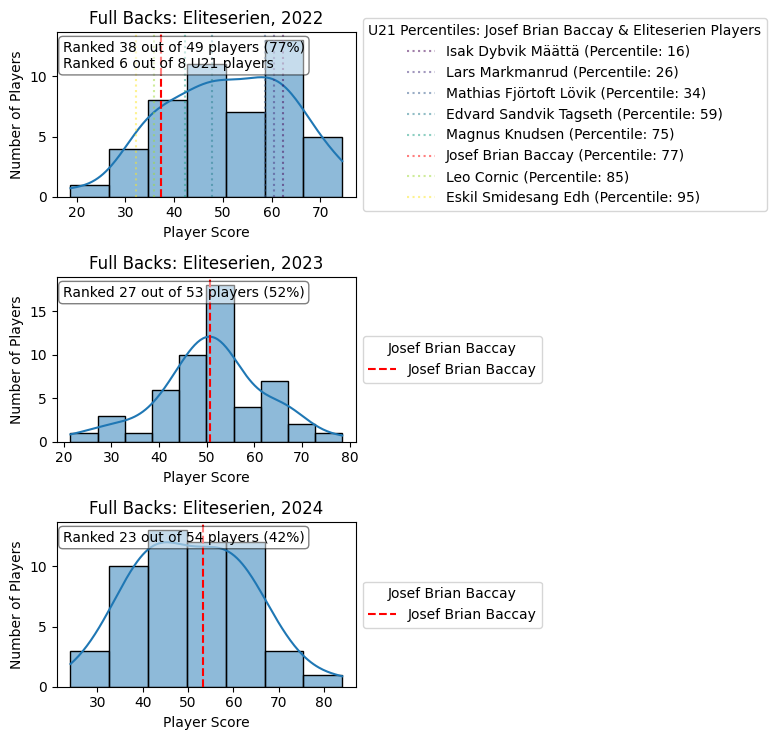

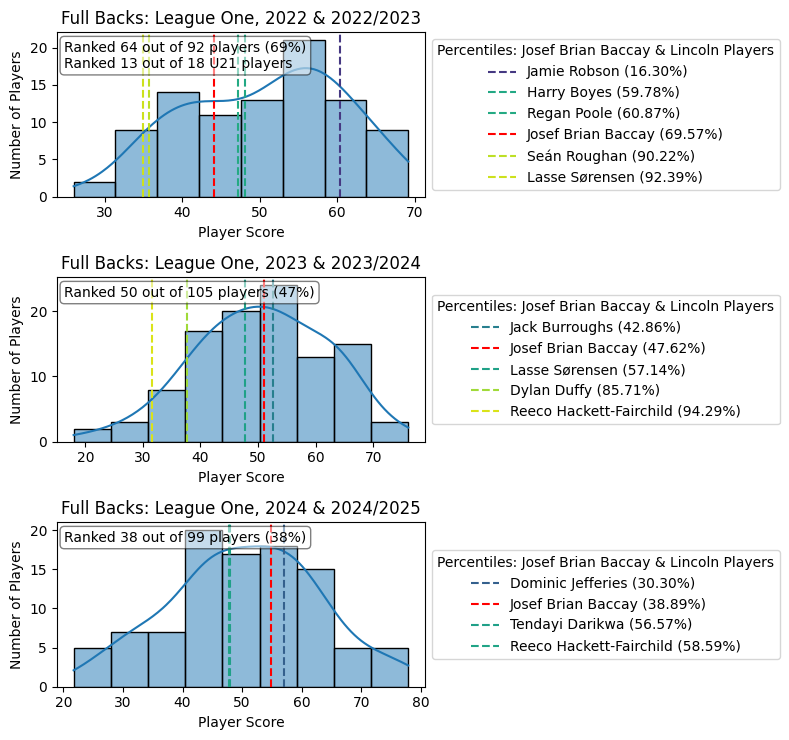

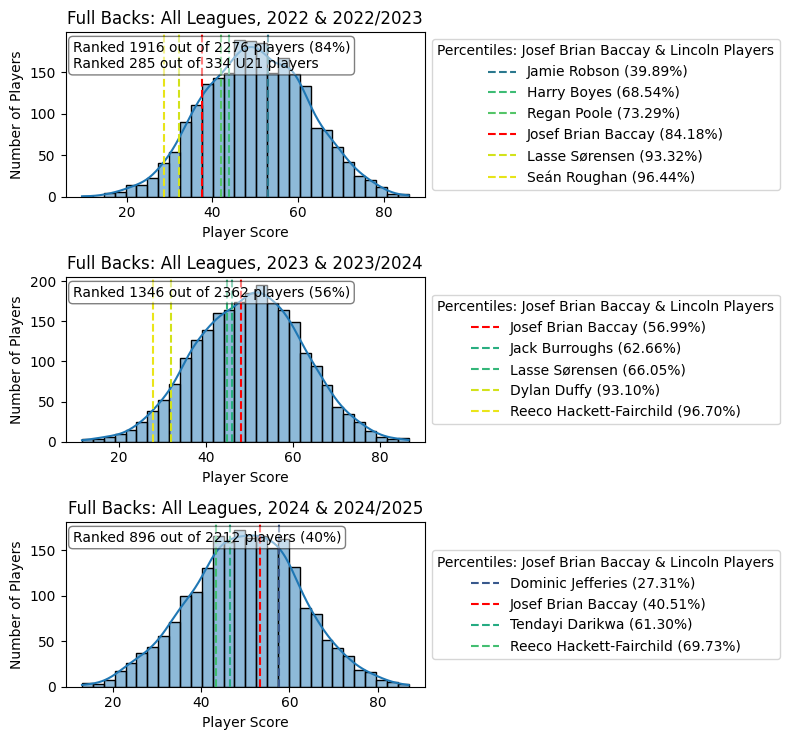

In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
from scipy.stats import rankdata
from remove_duplicate_rows_statsbomb import remove_duplicate_rows
from aggregate_rank_preprocessing_statsbomb import preprocess_df
from get_position_specific_metrics_statsbomb import get_player_metrics
from aggregate_rank_statsbomb import calculate_percentiles
from own_league_plot import plot_stacked_distribution_u21_flag
from aggregate_rank_league_one_statsbomb import calculate_percentiles_league_one
from league_one_plot import plot_distribution_league_one_u21
from aggregate_rank_all_leagues_statsbomb import calculate_percentiles_all
from all_league_plot import plot_distribution_all_leagues

# Load Data
base_path = '/Users/metinyarici/Library/CloudStorage/OneDrive-SharedLibraries-LincolnCityFC/Player Recruitment - Data Science/statsbomb_things/'
# df1 = pd.read_csv(base_path+'data/player_season_stats.csv')
# df2 = pd.read_csv(base_path+'data/player_season_stats_ccfc.csv')
# df = pd.concat([df1, df2])
df = pd.read_csv(base_path+'data/player_season_stats.csv')

# Cross platform information
cross_platform_path = '/Users/metinyarici/Library/CloudStorage/OneDrive-SharedLibraries-LincolnCityFC/Player Recruitment - Data Science/cross_platform/'
season_information = pd.read_csv(cross_platform_path+'season_information.csv')
position_information = pd.read_csv(cross_platform_path+'position_information.csv')
metric_grouping_information = pd.read_csv(cross_platform_path+'statsbomb_metric_groups.csv')

# Fix list in csvs to match python style
metric_grouping_information['positions_statsbomb'] = metric_grouping_information['positions_statsbomb'].apply(lambda x: ','.join([f"'{item}'" for item in x.split(',')]))
metric_grouping_information['statsbomb_metrics'] = metric_grouping_information['statsbomb_metrics'].apply(lambda x: ','.join([f"'{item}'" for item in x.split(',')]))
metric_grouping_information['positions_statsbomb'] = metric_grouping_information['positions_statsbomb'].apply(ast.literal_eval)
metric_grouping_information['statsbomb_metrics'] = metric_grouping_information['statsbomb_metrics'].apply(ast.literal_eval)

def process_positions(value):
    if isinstance(value, str):
        return [value.strip()]
    else:
        return [item.strip() for item in value]

metric_grouping_information['positions_statsbomb'] = metric_grouping_information['positions_statsbomb'].apply(process_positions)
metric_grouping_information['statsbomb_metrics'] = metric_grouping_information['statsbomb_metrics'].apply(process_positions)

# Season information
chronological_season_ids = season_information['statsbomb_season_id']

# # Pre process
# df = preprocess_df(df)
# df = remove_duplicate_rows(df)

# Find player data
player_id = 31663 #Baccay
player_df = df[df['player_id'] == player_id]

save_path = f"/Users/metinyarici/Library/CloudStorage/OneDrive-SharedLibraries-LincolnCityFC/Player Recruitment - Data Science/aggregate_ranking/output"
plot_stacked_distribution_u21_flag(player_df, df, metric_grouping_information, save_path)
plot_distribution_league_one_u21(player_df, df, metric_grouping_information, save_path, chronological_season_ids)
plot_distribution_all_leagues(player_df, df, metric_grouping_information, save_path)